<a href="https://colab.research.google.com/github/christianadriano/PCA_AquacultureSystem/blob/master/PCA_KMeans_Environment_Piscicultura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd #tables for data wrangling
import numpy as np #basic statistical methods 
import io #for uploading data

#Manual option
from google.colab import files
uploaded = files.upload() #choose file dados_relativizados_centralizados_piscicultura.csv



Saving dados_relativizados_centralizados_piscicultura.csv to dados_relativizados_centralizados_piscicultura (1).csv


In [ ]:
#Upload data from cvs file
df = pd.read_csv(io.StringIO(uploaded['dados_relativizados_centralizados_piscicultura.csv'].decode('utf-8'))) 
print(df)

In [ ]:
column_names = df.columns
#Select fatores Ambientais 
feature_names = [name for name in column_names if name.startswith("A")] 

#feature_names = list(df.columns["A2_DA":"A4_EUC"])
#print(feature_names)
list_names = ['cultivo'] + feature_names
df_cultivo = df[list_names]
df_cultivo.head()



In [27]:
#Look at correlations 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

corr = df_cultivo.corr()

# using a styled panda's dataframe from https://stackoverflow.com/a/42323184/1215012
cmap = 'coolwarm'

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_precision(2)\



,A2_DA,A3_UE,A5_UN,A6_UF,A7_EUE,A8_EUN,A9_EUF,A12_PPO,A22_REC,A4_EUC
A2_DA,1.00,0.01,0.09,0.16,0.25,0.35,0.10,-0.30,-0.49,-0.12
A3_UE,0.01,1.00,0.56,-0.05,0.89,0.58,0.95,0.00,-0.42,0.83
A5_UN,0.09,0.56,1.00,0.75,0.52,0.29,0.67,-0.01,-0.40,0.56
A6_UF,0.16,-0.05,0.75,1.00,-0.10,-0.15,0.08,-0.01,-0.27,0.03
A7_EUE,0.25,0.89,0.52,-0.10,1.00,0.80,0.95,-0.17,-0.31,0.77
A8_EUN,0.35,0.58,0.29,-0.15,0.80,1.00,0.69,-0.27,0.14,0.27
A9_EUF,0.10,0.95,0.67,0.08,0.95,0.69,1.00,-0.07,-0.37,0.83
A12_PPO,-0.30,0.00,-0.01,-0.01,-0.17,-0.27,-0.07,1.00,0.02,-0.03
A22_REC,-0.49,-0.42,-0.40,-0.27,-0.31,0.14,-0.37,0.02,1.00,-0.48
A4_EUC,-0.12,0.83,0.56,0.03,0.77,0.27,0.83,-0.03,-0.48,1.00


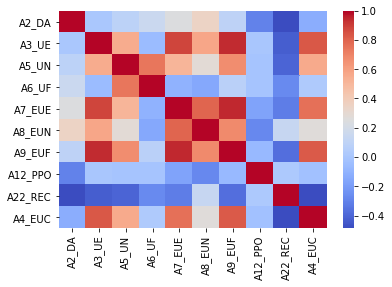

In [28]:
#smaller chart
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='coolwarm')

In [30]:
#check which ones are statiscally significant
from scipy.stats import pearsonr
import pandas as pd

def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

p_values = calculate_pvalues(df_cultivo)



In [31]:
#Plot p-values
cmap = 'coolwarm'

p_values.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_precision(2)

,A2_DA,A3_UE,A5_UN,A6_UF,A7_EUE,A8_EUN,A9_EUF,A12_PPO,A22_REC,A4_EUC
A2_DA,0.00,0.98,0.78,0.63,0.44,0.26,0.76,0.35,0.11,0.70
A3_UE,0.98,0.00,0.06,0.87,0.00,0.05,0.00,0.99,0.17,0.00
A5_UN,0.78,0.06,0.00,0.01,0.09,0.36,0.02,0.98,0.19,0.06
A6_UF,0.63,0.87,0.01,0.00,0.75,0.64,0.80,0.98,0.40,0.92
A7_EUE,0.44,0.00,0.09,0.75,0.00,0.00,0.00,0.60,0.32,0.00
A8_EUN,0.26,0.05,0.36,0.64,0.00,0.00,0.01,0.39,0.67,0.39
A9_EUF,0.76,0.00,0.02,0.80,0.00,0.01,0.00,0.84,0.24,0.00
A12_PPO,0.35,0.99,0.98,0.98,0.60,0.39,0.84,0.00,0.94,0.94
A22_REC,0.11,0.17,0.19,0.40,0.32,0.67,0.24,0.94,0.00,0.11
A4_EUC,0.70,0.00,0.06,0.92,0.00,0.39,0.00,0.94,0.11,0.00


**PCA** 
Now we do the PCA 

In [ ]:
#Normalize the data to have MEAN==0
from sklearn.preprocessing import StandardScaler

x = df_cultivo.iloc[:,1:].values
x = StandardScaler().fit_transform(x) # normalizing the features
#print(x)


In [ ]:
#Run PCA 
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df_cultivo[['cultivo']]], axis = 1)

['Truta - race-way' 'Tilapia - gaiolas - SP -  sem restricao alimentar'
 'Tilapia - gaiolas - SP - com restricao alimentar'
 'Tilapia - gaiola - RS' 'Tambatinga - viveiro 2'
 'Tambatinga - viveiro 23' 'Tambatinga - viveiro 250'
 'Tambaqui - M amazonicum - policultivo - SP' 'Tilapia - tanque rede - RN'
 'Lambari - semi intensivo - baixo controle'
 'Lambari - semi intensivo - médio controle'
 'Lambari - semi intensivo - alto controle']


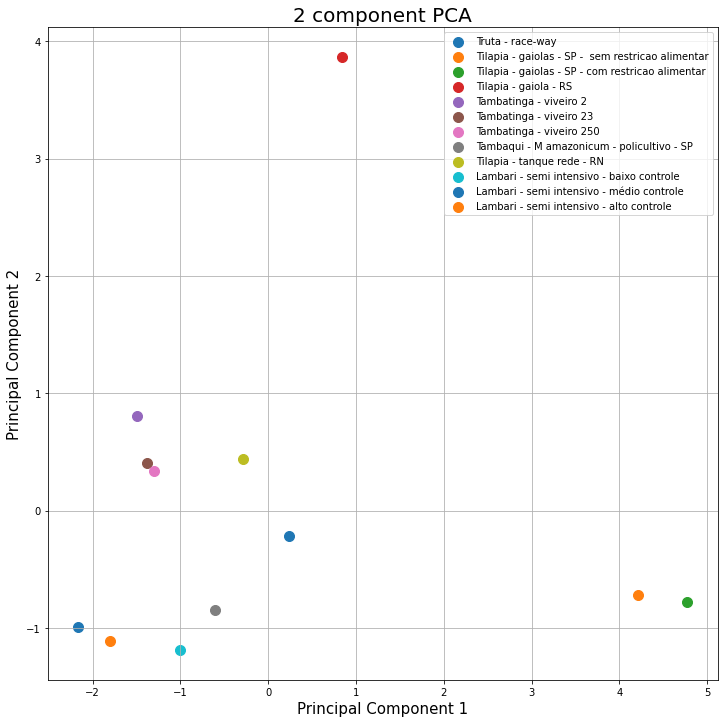

In [ ]:
#Visualize results of PCA
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = df_cultivo['cultivo'].to_numpy()
print(targets)
for target in targets:
    indicesToKeep = finalDf['cultivo'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , s = 100)
   
#for names in feature_names:  
#    ax.annotate(txt, (z[i], y[i]))

ax.legend(targets)
ax.grid()

In [ ]:
variance_list =pca.explained_variance_ratio_
print("variance explained by each component:", variance_list)
print("total variance explained:", sum(variance_list))


variance explained by each component: [0.47074243 0.18001895]
total variance explained: 0.650761379060835


In [ ]:
#principal components for each indicador
#print(principalComponents)
#print(targets)
df_clustering = pd.DataFrame({'cultivo': targets,  'pc1':list(principalComponents[:,0]), 'pc2': list(principalComponents[:,1])}, columns=['cultivo', 'pc1','pc2'])
#df_clustering

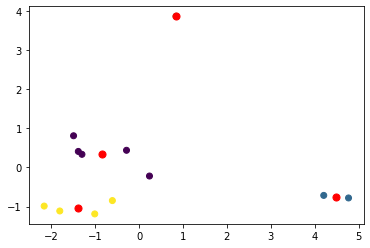

In [ ]:
#Find clusters 
from sklearn.cluster import KMeans
#4 clusters
model = KMeans(4)
model.fit(df_clustering.iloc[:,1:3])
#print(model.cluster_centers_)

#Plot clusters
plt.scatter(df_clustering.iloc[:,1],df_clustering.iloc[:,2], c=model.labels_.astype(float));
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=50, color="red"); # Show the 

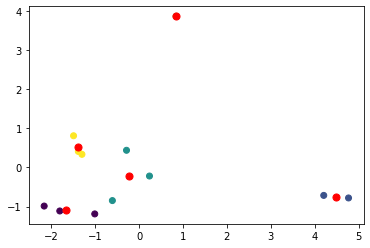

In [ ]:
#5 clusters
model = KMeans(5)
model.fit(df_clustering.iloc[:,1:3])
#print(model.cluster_centers_)

#Plot clusters
plt.scatter(df_clustering.iloc[:,1],df_clustering.iloc[:,2], c=model.labels_.astype(float));
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=50, color="red"); # Show the 


In my view, we have two large clusters and three outliers, as the graph above shows.

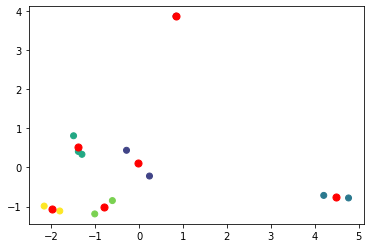

In [ ]:
#6 clusters
model = KMeans(6)
model.fit(df_clustering.iloc[:,1:3])
#print(model.cluster_centers_)

#Plot clusters
plt.scatter(df_clustering.iloc[:,1],df_clustering.iloc[:,2], c=model.labels_.astype(float));
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=50, color="red"); # Show the 

#7 clusters